A topic model is a low-rank representation of a word co-occurrence matrix typically generated by a matrix factorization such as a Singular Value Decomposition or Non-Negative Matrix Factorization or probabilistically as in the Latent Dirichlet Allocation. 

Topic Coherence is a metric for automatically assessing the quality of such a topic model. 

Intrinsic and Extrinsic methods exist for computing Topic Coherence.

mimno2011 proposes an intrinsic measure based upon point-wise mutual information between words comprising a topic. 


### mimno2011

> evaluation of topics as semantically coherent concepts

would correspond to the evaluation of a **single** principal component as a coherent entity

*probably won't use this as it leads to principal components with a different number of dominant features*. 

When speaking about principal components the assignment of a token would correspond to the an original feature being salient to the principal component. Say if a feature's loading value for a specific PC is greater than some parameter $\gamma$ then the feature is salient.

### Computing Coherence

> Letting $D(v)$ be the *document frequency* of word type $v$ (i.e. the number of documents with at least one token of type $v$) and $D(v,v')$ be *co-document frequency* of word types $v$ and $v'$ (i.e., the number of documents containing one or more tokens of type $v$ and at least one token of type $v'$), we define *topic coherence* as 

$$C(t;V^{(t)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{D(v_m^{(t)}, v_l^{(t)}) + 1}{D(v_l^{(t)})}$$

Where $V^{(t)}=\left(v_1^{(t))},\dots,v_M^{(t))}\right)$ is a list of the $M$ most probable words in topic $t$. A smoothing count of 1 is included to avoid taking the logarithm of zero.

### Pointwise Mutual Information

$$\text{PMI}(w_i, w_j) = \log\frac{p(w_i,w_j)}{p(w_i)p(w_j)}$$

## Coherence on a Latent Semantic Analysis


1. generate document-term matrix, $A$
1. use SVD to decompose to $A=XY$
1. consider $Y_0$, identify $M$ most probable words 
1. compute using 

   $$C(t;V^{(0)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{D(v_m^{(0)}, v_l^{(0)}) + 1}{D(v_l^{(0)})}$$

   or stated as probabilities
   
   $$C(t;V^{(0)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{p(w_i, w_j) + 1}{p(w_j)}$$
   
   this value is the coherence of a given topic

### Possible to compute using simple Mutual Information

$$C(t;V^{(0)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{p(w_i, w_j)}{p(w_i)p(w_j)} = \sum_{m=2}^M\sum_{l=1}^{m-1}\text{PMI}(w_i, w_j)$$

## Coherence on a Principal Component Analysis

1. Perform Principal Component Analysis, $A = XY$
1. Consider $Y_0$, identify $M$ most salient features, where the loading value $Y_{(i,0)} > \gamma$.
1. Compute using 
   $$C(pc;V^{(0)}) = \sum_{m=2}^M\sum_{l=1}^{m-1}\log \frac{p(f_i, f_j)}{p(f_i)p(f_j)} = \sum_{m=2}^M\sum_{l=1}^{m-1}\text{PMI}(f_i, f_j)$$
   

Where $V^{(pc)}=\left(f_1^{(pc))},\dots,f_M^{(pc))}\right)$ is the set of the $M$ most salient features to $pc$.

Several authors have propsed methods for non-parametric methods for computing mutual information:

- A. Kraskov, H. Stogbauer and P. Grassberger, “Estimating mutual information”. Phys. Rev. E 69, 2004.
- B. C. Ross “Mutual Information between Discrete and Continuous Data Sets”. PLoS ONE 9(2), 2014.
- L. F. Kozachenko, N. N. Leonenko, “Sample Estimate of the Entropy of a Random Vector”, Probl. Peredachi Inf., 23:2 (1987), 9-16

These have been implemented in the Scikit-Learn package:
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

In [14]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [4]:
IRIS = load_iris()
iris_df = pd.DataFrame(IRIS.data)
iris_df.sample(5)

,0,1,2,3
110,6.5,3.2,5.1,2.0
139,6.9,3.1,5.4,2.1
97,6.2,2.9,4.3,1.3
142,5.8,2.7,5.1,1.9
64,5.6,2.9,3.6,1.3


In [49]:
n = iris_df.shape[1]
pca_model_1 = PCA(n_components=n)
pca_model_2 = PCA(n_components=n)
pca_model_3 = PCA(n_components=n)
pca_model_4 = PCA(n_components=n)

In [50]:
pca_model_1.fit(iris_df)
pca_model_2.fit((iris_df - iris_df.mean())/iris_df.std())

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

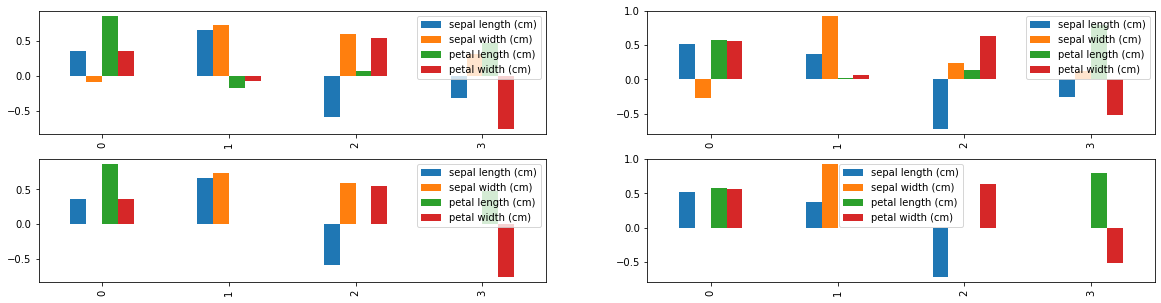

In [59]:
gamma = 0.33
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize=(20,5))
loadings_1 = pd.DataFrame(pca_model_1.components_, columns=IRIS.feature_names)
loadings_1.plot(kind="bar", ax=ax[0][0])
loadings_2 = pd.DataFrame(pca_model_2.components_, columns=IRIS.feature_names)
loadings_2.plot(kind="bar", ax=ax[0][1])
loadings_1_masked = loadings_1.where(np.abs(loadings_1) > gamma, 0)
loadings_1_masked.plot(kind="bar", ax=ax[1][0])
loadings_2_masked = loadings_2.where(np.abs(loadings_2) > gamma, 0)
loadings_2_masked.plot(kind="bar", ax=ax[1][1])


In [48]:
import math
loadings = pd.DataFrame(pca_model_1.components_).T
M = int(math.sqrt(n))
def top_M_features(pc, M):
    return np.abs(loadings[pc]).sort_values(ascending=False).index[:M]
top_M_features(0,M), top_M_features(1,M), top_M_features(2, M), top_M_features(3,M)

(Int64Index([2, 0], dtype='int64'),
 Int64Index([1, 0], dtype='int64'),
 Int64Index([1, 0], dtype='int64'),
 Int64Index([3, 2], dtype='int64'))

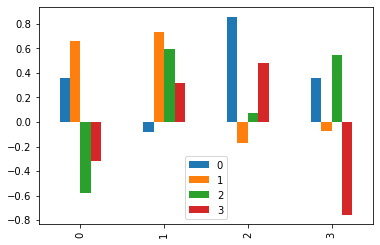

In [32]:
loadings.plot(kind="bar")

In [34]:
loadings

,0,1,2,3
0,0.361387,0.656589,-0.582030,-0.315487
1,-0.084523,0.730161,0.597911,0.319723
2,0.856671,-0.173373,0.076236,0.479839
3,0.358289,-0.075481,0.545831,-0.753657


In [33]:
loadings[1].sort_values(ascending=False)

1    0.730161
0    0.656589
3   -0.075481
2   -0.173373
Name: 1, dtype: float64